<h1>Investment Assignment<h1>

<h2>Submitted By: Kiran Gupta</h2>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Check-Points-1<h2>

In [2]:
##Read both the input files companies and rounds2
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv", sep=',', encoding = "ISO-8859-1")

In [3]:
##Change the character in 
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())
companies.permalink = companies.permalink.apply(lambda x: x.lower())

In [4]:
rounds2.company_permalink=rounds2.company_permalink.map(lambda x: 
                                            x.encode('utf-8').decode('ascii', 'ignore'))
companies.permalink=companies.permalink.map(lambda x: x.encode('utf-8').decode('ascii','ignore'))


In [5]:
##Merge two dataframe
master_frame = pd.merge(rounds2,companies, left_on='company_permalink', 
                        right_on='permalink', sort=True, how ='left')

In [6]:
rounds2.info()
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 2.5+ MB

In [7]:
##Check-Points-Q1: Name of the unqiue country present in countries Table

len(rounds2.company_permalink.unique())

66368

In [8]:
##Checkpoint1-Q2: No of unique companies present in Compaines Table

print(len(companies.permalink.unique()))

66368


In [9]:
##Checkpoints1-Q4: Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

companies.loc[~rounds2.company_permalink.isin(companies.permalink)] 


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


<h3>Check-Points-2<h3>

In [10]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 8.3+ MB


In [11]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [12]:
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)),2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64


In [13]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [14]:
master_frame.status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [15]:
master_frame = master_frame[master_frame['status']!='closed']

In [16]:
master_frame.status.unique()

array(['operating', 'acquired', 'ipo'], dtype=object)

In [17]:
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)),2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.74
funded_at                   0.00
raised_amount_usd          17.25
permalink                   0.00
name                        0.00
homepage_url                5.00
category_list               2.25
status                      0.00
country_code                6.43
state_code                  8.41
region                      7.72
city                        7.71
founded_at                 16.80
dtype: float64


In [18]:
master_frame.raised_amount_usd.isnull().sum()

18321

In [19]:
master_frame[master_frame['raised_amount_usd'].isna()]
master_frame.raised_amount_usd.isnull().sum()

18321

In [20]:
master_frame.shape

(106224, 16)

In [21]:
master_frame = master_frame[master_frame.raised_amount_usd.notnull()]


In [22]:
master_frame.raised_amount_usd.isnull().sum()

0

In [23]:
master_frame.shape

(87903, 16)

In [24]:
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)),2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.21
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.31
category_list               0.72
status                      0.00
country_code                5.26
state_code                  7.10
region                      6.50
city                        6.50
founded_at                 15.82
dtype: float64


In [25]:
master_frame.raised_amount_usd = round(master_frame.raised_amount_usd/1000000,2)

In [26]:
master_frame = master_frame[master_frame.country_code.notnull()]


In [27]:
master_frame.shape

(83277, 16)

In [28]:
####Check-Points2:Average Values of Investments for Each of these Funding Types		
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel                      0.994663
convertible_note           1.339922
debt_financing            17.890961
equity_crowdfunding        0.511110
grant                      4.286122
non_equity_assistance      0.460508
post_ipo_debt            175.469710
post_ipo_equity           67.093620
private_equity            75.797198
product_crowdfunding       1.521184
secondary_market          94.089200
seed                       0.763052
undisclosed               16.018166
venture                   11.903144
Name: raised_amount_usd, dtype: float64

In [29]:
##Check-Point2-Q4: Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5.00,15.00,inclusive = True)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd, dtype: bool

In [30]:
master_frame_venture = master_frame[master_frame.funding_round_type =='venture']

In [31]:
master_frame_venture.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         19874
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                1983
category_list                201
status                         0
country_code                   0
state_code                   696
region                       549
city                         549
founded_at                  7506
dtype: int64

<h3>Check-Points-3<h3>

In [33]:
top9 = master_frame_venture.groupby('country_code', as_index=False)['raised_amount_usd'].sum().sort_values(by=['raised_amount_usd'],ascending=False).head(9)

In [34]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 94 to 45
Data columns (total 2 columns):
country_code         9 non-null object
raised_amount_usd    9 non-null float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


In [35]:
top9

,country_code,raised_amount_usd
94,USA,399934.80
15,CHN,39101.65
29,GBR,18241.31
39,IND,14050.66
12,CAN,8825.47
28,FRA,6775.01
42,ISR,6503.00
21,DEU,6061.22
45,JPN,3242.05


In [36]:
top9.index=range(9)

In [37]:
top9

,country_code,raised_amount_usd
0,USA,399934.80
1,CHN,39101.65
2,GBR,18241.31
3,IND,14050.66
4,CAN,8825.47
5,FRA,6775.01
6,ISR,6503.00
7,DEU,6061.22
8,JPN,3242.05


<h3>Check-Points-4<h3>

In [38]:
mapping = pd.read_csv('mapping.csv')

In [39]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [40]:
mapping.shape

(688, 10)

In [41]:
mapping['category_list']=mapping['category_list'].str.replace('0','na')

In [42]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [43]:
mapping = mapping.melt(id_vars="category_list", 
        value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])
                    

In [44]:
mapping.shape

(6192, 3)

In [45]:
mapping = mapping[mapping.value==1]

In [46]:
mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [47]:
mapping.reset_index(drop=True).head()

,category_list,variable,value
0,Adventure Travel,Automotive & Sports,1
1,Aerospace,Automotive & Sports,1
2,Auto,Automotive & Sports,1
3,Automated Kiosk,Automotive & Sports,1
4,Automotive,Automotive & Sports,1


In [48]:
primary_sector = master_frame_venture['category_list'].str.split('|',expand=True, n=1)

In [49]:
primary_sector.head()

,0,1
0,Media,None
4,Curated Web,None
8,Biotechnology,None
10,Analytics,None
11,Analytics,None


In [50]:
master_frame_venture.shape

(44949, 16)

In [51]:
master_frame_venture.insert(16,'primary_sector',value=primary_sector[0])

In [52]:
master_frame_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.72,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.70,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics


In [53]:
venture = pd.merge(master_frame_venture,mapping, left_on='primary_sector',right_on="category_list", how = 'inner')

In [54]:
venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,variable,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment,1
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment,1
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.8,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment,1
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment,1
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Media,Entertainment,1


In [55]:
vernture = venture.drop(['value','category_list_x','category_list_y'],axis=1, inplace=True)

In [56]:
venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,primary_sector,variable
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.0,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.8,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18.0,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment


In [57]:
venture.rename(columns = {'variable':'main_sector'}, inplace=True)
venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.0,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.8,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18.0,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment


In [58]:
venture.groupby('main_sector').main_sector.count()


main_sector
Automotive & Sports                          690
Blanks                                       201
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [59]:
venture=venture[venture.main_sector !='Blanks']

In [60]:
venture.groupby('main_sector').main_sector.count()


main_sector
Automotive & Sports                          690
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [61]:
venture = venture[venture.raised_amount_usd.between(5.00, 15.00, inclusive=True)]

<h3>Check-Points-5<h3>

In [62]:
d1 = venture[venture.country_code=='USA']
d2 = venture[venture.country_code=='GBR']
d3 = venture[venture.country_code=='IND']

In [63]:
d1 = d1.assign(total_num_investment = d1.groupby('main_sector')['raised_amount_usd'].transform('count'))
d1 = d1.assign(total_amt_investment = d1.groupby('main_sector')['raised_amount_usd'].transform('sum'))
d1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_num_investment,total_amt_investment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,531,4602.76
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.0,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,531,4602.76
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.76
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.76
30,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5.0,/organization/mediabong,MEDIABONG,http://www.mediabong.com,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,531,4602.76


In [64]:
d2 = d2.assign(total_num_investment = d2.groupby('main_sector')['raised_amount_usd'].transform('count'))
d2 = d2.assign(total_amt_investment = d2.groupby('main_sector')['raised_amount_usd'].transform('sum'))


In [65]:
d3 = d3.assign(total_num_investment = d3.groupby('main_sector')['raised_amount_usd'].transform('count'))
d3 = d3.assign(total_amt_investment = d3.groupby('main_sector')['raised_amount_usd'].transform('sum'))


In [66]:
##Check-points5: Q1 Total number of Investments (count)
d1.shape[0]


11271

In [67]:
d2.shape[0]

582

In [68]:

d3.shape[0]

315

In [69]:
#Total amount of investment (USD)
d1.raised_amount_usd.sum()

100861.93000000001

In [70]:
d2.raised_amount_usd.sum()

5061.24

In [71]:
d3.raised_amount_usd.sum()

2820.6800000000003

In [72]:
##Top Sector name (no. of investment-wise)
top_sector_d1 = d1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)
top_sector_d2 = d2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)
top_sector_d3 = d3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)

In [73]:
##Second Sector name (no. of investment-wise)
##Second Sector name (no. of investment-wise)
##Third Sector name (no. of investment-wise)
top_sector_d1.index[0:3]

Index(['Others', 'Social, Finance, Analytics, Advertising',
       'Cleantech / Semiconductors'],
      dtype='object', name='main_sector')

In [74]:
top_sector_d2.index[0:3]

Index(['Others', 'Social, Finance, Analytics, Advertising',
       'Cleantech / Semiconductors'],
      dtype='object', name='main_sector')

In [75]:
top_sector_d3.index[0:3]

Index(['Others', 'Social, Finance, Analytics, Advertising',
       'News, Search and Messaging'],
      dtype='object', name='main_sector')

In [76]:
#Number of investments in top sector (3)
#Number of investments in second sector (4)
#Number of investments in third sector (5)
top_sector_d1[0:3]

main_sector
Others                                     2766
Social, Finance, Analytics, Advertising    2594
Cleantech / Semiconductors                 2152
Name: main_sector, dtype: int64

In [77]:
top_sector_d2[0:3]

main_sector
Others                                     141
Social, Finance, Analytics, Advertising    128
Cleantech / Semiconductors                 115
Name: main_sector, dtype: int64

In [78]:
top_sector_d3[0:3]

main_sector
Others                                     103
Social, Finance, Analytics, Advertising     59
News, Search and Messaging                  49
Name: main_sector, dtype: int64

In [79]:
##For point 3 (top sector count-wise), which company received the highest investment?
d1[d1.main_sector =='Others'].sort_values('raised_amount_usd',ascending=False).head(1).name

39373    Carbonite
Name: name, dtype: object

In [80]:
d2[d2.main_sector =='Others'].sort_values('raised_amount_usd',ascending=False).head(1).name

16056    Tribold
Name: name, dtype: object

In [81]:
d3[d3.main_sector =='Others'].sort_values('raised_amount_usd',ascending=False).head(1).name

25209    K-12 Techno Services
Name: name, dtype: object

In [82]:
#For point 4 (second best sector count-wise), which company received the highest investment?
d1[d1.main_sector =='Social, Finance, Analytics, Advertising'].sort_values('raised_amount_usd',ascending=False).head(1).name

34565    Course Hero
Name: name, dtype: object

In [83]:
d2[d2.main_sector =='Social, Finance, Analytics, Advertising'].sort_values('raised_amount_usd',ascending=False).head(1).name

21964    SimilarWeb
Name: name, dtype: object

In [84]:
d3[d3.main_sector =='Social, Finance, Analytics, Advertising'].sort_values('raised_amount_usd',ascending=False).head(1).name

37282    ApnaPaisa
Name: name, dtype: object

<h3>Check-Points-6<h3>

In [85]:
master_frame_1 = master_frame[master_frame.funding_round_type.isin(['venture','seed','private_equity'])]

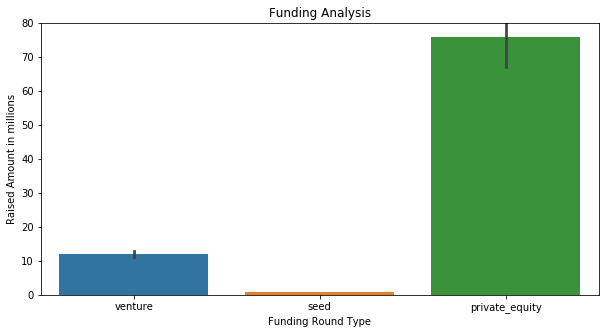

In [86]:
##Check-point6-Q1:A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. 
##This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
graph_1=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_1)
graph_1.set(xlabel='Funding Round Type', ylabel='Raised Amount in millions')
graph_1.set_title('Funding Analysis')
graph_1.set_ylim(0, 80)
plt.show()

In [87]:
top9

,country_code,raised_amount_usd
0,USA,399934.80
1,CHN,39101.65
2,GBR,18241.31
3,IND,14050.66
4,CAN,8825.47
5,FRA,6775.01
6,ISR,6503.00
7,DEU,6061.22
8,JPN,3242.05


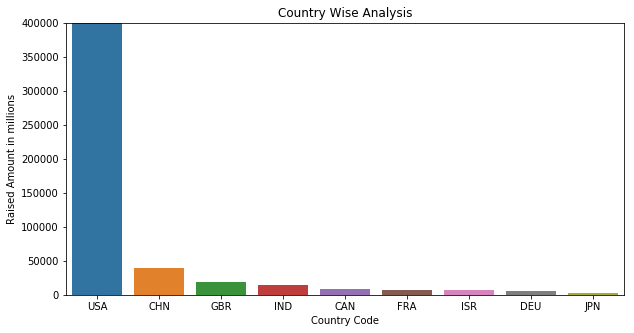

In [88]:
##A plot showing the top 9 countries against the total amount of investments of funding type FT. 
##This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

plt.figure(figsize=(10,5))
graph_2=sns.barplot(x='country_code', y='raised_amount_usd', data=top9)
graph_2.set(xlabel='Country Code', ylabel='Raised Amount in millions')
graph_2.set_title('Country Wise Analysis')
graph_2.set_ylim(0, 400000)
plt.show()

In [95]:
##Check-point6-3
master_file=d1[d1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [96]:
master_file.shape

(7512, 19)

In [97]:
master_file=master_file.append(d2[d2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])])


In [98]:

master_file.shape

(7896, 19)

In [99]:
master_file=master_file.append(d3[d3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])])


In [100]:

master_file.shape

(8107, 19)

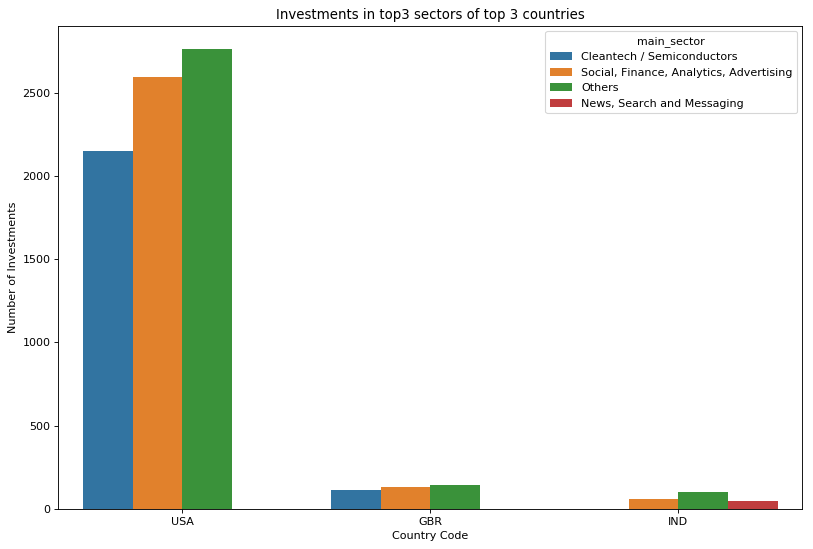

In [101]:
##A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 
plt.figure(num=None, figsize=(12, 8), dpi=80)

# specify hue="categorical_variable"
graph_3=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_file,estimator=lambda x: len(x))
graph_3.set(xlabel='Country Code', ylabel='Number of Investments')
graph_3.set_title('Investments in top3 sectors of top 3 countries')
plt.show()